# Factors Influencing Comment Count on Hacker News

__[Hacker News](https://news.ycombinator.com/)__ is a popular online platform and community-driven news website that focuses on topics related to technology, startups, programming, and entrepreneurship. It was created by the startup accelerator [Y Combinator](https://www.ycombinator.com/) and has gained a reputation for hosting insightful discussions and news articles within the tech community.

Hacker News operates as a social news platform, enabling registered users to share informative resources. Users have the ability to upvote or downvote submissions based on their quality and relevance. Submissions with the highest upvotes rise to the top of the Hacker News front page, increasing visibility and generating more community engagement. 

__Our goal__ is to understand what type of posts will gain the most comments and upvots. 

__Our target__ is the posts titled with `Ask HN` and `Show HN`:
`Ask HN`: Users submit posts to ask the Hacker News community a specific question.
`Show HN`: posts to show the Hacker News community a project, product, or just something interesting.

__Questions to answer:__
1. Do `Ask HN` and `Show HN` get more comments on average?
2. Do posts created at a certain time receive more cooments on average?

Let's first look at what type of data we are dealing with.


## Data

In [1]:
# Read in the data from hacker_news.csv
# The data has been randomly sampled from the original data
from csv import reader

file = open('hacker_news.csv')
data = reader(file)
hn = list(data)

print('Data:\n {}'.format(hn[:5]))

Data:
 [['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']]


In [2]:
# Extract the header
headers = hn[0]
hn = hn[1:]

print('Header:\n{}'.format(headers))
print('\nUpdated data:\n{}'.format(hn[:5]))

Header:
['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']

Updated data:
[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'], ['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4

## Data Cleaning
To focus exclusively on post titles starting with `Ask HN` or `Show HN`, we will generate separate lists that solely include data pertaining to these specific titles.

In [3]:
# Find the posts that begin with the key words
# Separate them into three different lists
ask_posts, show_posts, other_posts = [], [], []
for row in hn:
    title = row[1]
    title_l = title.lower() # make it lower case because capitalization matters for startswith() 
    if title_l.startswith('ask hn'):
        ask_posts.append(row)
    elif title_l.startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)
        
len_ask = len(ask_posts)
len_show = len(show_posts)
len_other = len(other_posts)
print('Number of posts in "Ask HN": {}'.format(len_ask))
print('Number of posts in "Show HN": {}'.format(len_show))
print('Number of other posts: {}'.format(len_other))

Number of posts in "Ask HN": 1744
Number of posts in "Show HN": 1162
Number of other posts: 17194


## Data Analysis

### [1] Average Number of Comments
Let's analyze whether ask posts or show posts tend to receive a higher average number of comments.

In [4]:
# Find the total number of comments in ask posts
total_ask_comments = 0
for row in ask_posts:
    num = row[4]
    total_ask_comments += int(num)
avg_ask_comments = total_ask_comments/len_ask
    
# Find the total number of comments in show posts
total_show_comments = 0
for row in show_posts:
    num = row[4]
    total_show_comments += int(num)
avg_show_comments = total_show_comments/len_show

print('Total & Average number of comments in ask posts: {}, {:.2f}'.format(total_ask_comments,avg_ask_comments))
print('Total & Average number of comments in show posts: {}, {:.2f}'.format(total_show_comments,avg_show_comments))

Total & Average number of comments in ask posts: 24483, 14.04
Total & Average number of comments in show posts: 11988, 10.32


Both the total number of posts and the comments are higher for `Ask HN` posts, and the average number of comments in `Ask HN` posts is higher than `Show HN`. <br>
Given that ask posts have a higher likelihood of receiving comments, we will narrow down our remaining analysis exclusively to __`Ask HN`__ posts.


### [2] Timing of Posts

In the following analysis, we will investigate whether there is a correlation between the timing of `Ask HN` posts and their likelihood of attracting comments.

In [5]:
# Calculate the number of ask posts created in each hour of the day, along with the number of comments received.
import datetime as dt

# Create a list of [date, number of comments]
result_list = []
for row in ask_posts:
    result_list.append([row[-1],int(row[4])])
    
# Create frequency tables for:
# 1. number of posts created in each hour 
# 2. number of comments created in each hour
counts_by_hour, comments_by_hour = {}, {}
for row in result_list:
    time = row[0]
    time_dt = dt.datetime.strptime(time, "%m/%d/%Y %H:%M")
    hour = time_dt.strftime("%H")
    num_com = row[1]
    
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = row[1]
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] = num_com

print('Hour-counts: \n {}\n'.format(counts_by_hour))
print('Hour-comments: \n {}\n'.format(comments_by_hour))

Hour-counts: 
 {'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58}

Hour-comments: 
 {'09': 2, '13': 13, '10': 1, '14': 18, '16': 2, '23': 2, '12': 3, '17': 5, '15': 1, '21': 8, '20': 9, '02': 6, '18': 199, '03': 1, '05': 2, '19': 2, '01': 4, '22': 1, '08': 2, '04': 2, '00': 15, '06': 22, '07': 1, '11': 29}



In [6]:
# Calculate the average number of comments per post for post created during each hour of the day
avg_by_hour = []
for hour in comments_by_hour:
    avg_by_hour.append([hour, comments_by_hour[hour]/counts_by_hour[hour]])
    
print('Hour-average number of comments: \n {}\n'.format(avg_by_hour))

Hour-average number of comments: 
 [['09', 0.044444444444444446], ['13', 0.15294117647058825], ['10', 0.01694915254237288], ['14', 0.16822429906542055], ['16', 0.018518518518518517], ['23', 0.029411764705882353], ['12', 0.0410958904109589], ['17', 0.05], ['15', 0.008620689655172414], ['21', 0.07339449541284404], ['20', 0.1125], ['02', 0.10344827586206896], ['18', 1.8256880733944953], ['03', 0.018518518518518517], ['05', 0.043478260869565216], ['19', 0.01818181818181818], ['01', 0.06666666666666667], ['22', 0.014084507042253521], ['08', 0.041666666666666664], ['04', 0.0425531914893617], ['00', 0.2727272727272727], ['06', 0.5], ['07', 0.029411764705882353], ['11', 0.5]]



18:00: 1.83 average comments per post
11:00: 0.50 average comments per post
06:00: 0.50 average comments per post
00:00: 0.27 average comments per post
14:00: 0.17 average comments per post
13:00: 0.15 average comments per post
20:00: 0.11 average comments per post
02:00: 0.10 average comments per post
21:00: 0.07 average comments per post
01:00: 0.07 average comments per post
17:00: 0.05 average comments per post
09:00: 0.04 average comments per post
05:00: 0.04 average comments per post
04:00: 0.04 average comments per post
08:00: 0.04 average comments per post
12:00: 0.04 average comments per post
23:00: 0.03 average comments per post
07:00: 0.03 average comments per post
16:00: 0.02 average comments per post
03:00: 0.02 average comments per post
19:00: 0.02 average comments per post
10:00: 0.02 average comments per post
22:00: 0.01 average comments per post
15:00: 0.01 average comments per post

Top 5 Hours for Ask Posts Comments: 
 ['18', '11', '06', '00', '14']


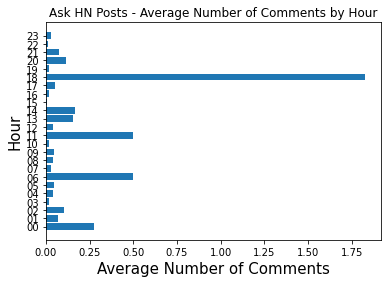

In [7]:
# Sorting the list in descending order
swap_avg_by_hour = []
for row in avg_by_hour:
    # Swap the first and second items
    swap_avg_by_hour.append([row[1],row[0]])
# Sort the list
sorted_bynum = sorted(swap_avg_by_hour,reverse=True)
sorted_byhour = sorted(avg_by_hour)
for row in sorted_bynum:
    hour = row[1]
    num = row[0]
    hour_dt = dt.datetime.strptime(hour,"%H")
    hour_format = hour_dt.strftime("%H:%M")
    print('{}: {:.2f} average comments per post'.format(hour_format, num))

print('\nTop 5 Hours for Ask Posts Comments: \n {}'.format([row[1] for row in sorted_bynum[:5]]))

# Plot out the total number of user ratings versus genre
import matplotlib.pyplot as plt

hour = [row[0] for row in sorted_byhour]
num = [row[1] for row in sorted_byhour]

plt.barh(range(len(hour)), num, tick_label=hour)
plt.xlabel('Average Number of Comments', fontsize=15)
plt.ylabel('Hour', fontsize=15)
plt.rcParams['figure.figsize'] = [10, 10]
plt.title('Ask HN Posts - Average Number of Comments by Hour')
plt.show()

6PM has the greatest average number of comments, so posting at 6 PM has a higher chance of receiving comments. The data is created at Eastern Time zone, and that will be 5PM CDT.

## Conclusions
In this project, we've explored the factors that migh influence the number of comments by:
- comparing the total and average number of comments for `Ask HN` and `Show HN` posts
- comparing the average number of comments at different hours

We have come to a conclusion that to gain a higher chance of receiving comments, it will be best to create the post at __6PM Eastern Time Zone__, which is __5PM CDT__.
